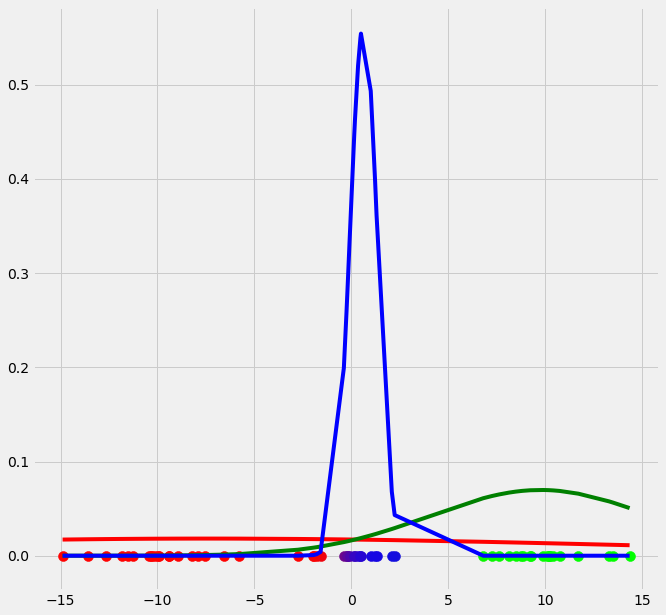

In [41]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import style
style.use ('fivethirtyeight')

#data points
np.random.seed (0)
X = np.linspace (-5, 5, num = 20)
X0 = X*np.random.rand (len(X)) + 10
X1 = X*np.random.rand (len(X)) - 10
X2 = X*np.random.rand (len(X))
X_tot = np.stack ((X0, X1, X2)).flatten ()

### Expectation step ###

#probabilities of data points belonging to a distribution
r = np.zeros ((len(X_tot), 3))
#distributions
gauss_1 = norm (loc = -5, scale = 5)
gauss_2 = norm (loc = 8, scale = 3)
gauss_3 = norm (loc = 1.5, scale = 1)
#probabilities of the clusters (gaussians)
m = np.array ([1/3, 1/3, 1/3]) #sum of gaussians of a cluster
pi = m / np.sum (m) #probability of a cluster
#assign gaussians to each data point
for c, g, p in zip (range (3),\
                    [gauss_1, gauss_2, gauss_3],\
                    pi):
    r [:, c] = p*g.pdf (X_tot)
#normalize the probabilities
for i in range (len (r)):
    r[i] = r[i] / (np.sum (pi) * np.sum (r, axis = 1) [i])

### Maximization step ###
    
#m_c
m_c = []
for c in range (len (r[0])):
    m = np.sum (r[:,c])
    m_c.append (m)

#pi_c
pi_c = []
for m in m_c:
    pi_c.append (m / np.sum (m_c))

#mu_c
mu_c = np.sum (X_tot.reshape (len(X_tot), 1)*r, axis = 0) / m_c

#var_c
var_c = []
for c in range (len (r[0])):
    var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(X_tot.reshape(len(X_tot),1)-mu_c[c])).T,(X_tot.reshape(len(X_tot),1)-mu_c[c])))

#update the gaussians
gauss_1 = norm(loc=mu_c[0],scale=var_c[0]) 
gauss_2 = norm(loc=mu_c[1],scale=var_c[1])
gauss_3 = norm(loc=mu_c[2],scale=var_c[2])
    
#plot
fig = plt.figure (figsize = (10, 10))
ax0 = fig.add_subplot (111)
for i in range(len(r)):
    # We have defined the first column as red, the second as                                                                    
    # green and the third as blue
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)

for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60,1)),\
                gauss_2.pdf(np.sort(X_tot).reshape(60,1)),\
                gauss_3.pdf(np.sort(X_tot).reshape(60,1))],\
               ['r','g','b']):
    ax0.plot(np.sort(X_tot),g,c=c)

plt.show()